In [5]:
pip install mpl_finance

You should consider upgrading via the '/usr/local/Cellar/jupyterlab/2.2.9_1/libexec/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


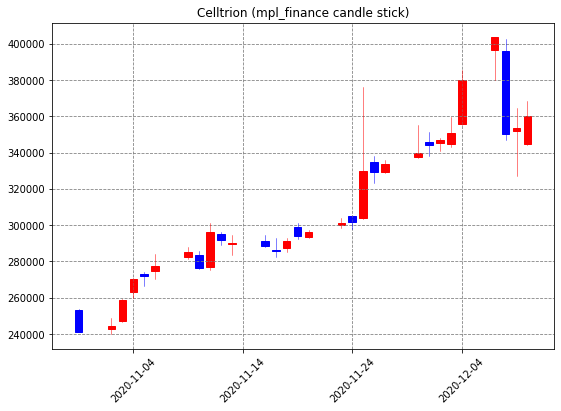

In [30]:
import pandas as pd
from urllib.request import urlopen
from bs4 import BeautifulSoup
from matplotlib import pyplot as plt
from matplotlib import dates as mdates
from mpl_finance import candlestick_ohlc
from datetime import datetime

url = "https://finance.naver.com/item/sise_day.nhn?code=068270&page=1"
with urlopen(url) as doc :
    html = BeautifulSoup(doc, 'lxml')
    pgrr = html.find('td', class_='pgRR')
    s = str(pgrr.a['href']).split('=')
    last_page = s[-1]

df = pd.DataFrame()
sise_url = "https://finance.naver.com/item/sise_day.nhn?code=068270"

for page in range(1, int(last_page)+1):
    page_url = '{}&page={}'.format(sise_url, page)
    df = df.append(pd.read_html(page_url, header=0)[0])

df = df.dropna()
df = df.iloc[0:30]
df = df.sort_values(by='날짜')
for idx in range(0, len(df)):
    dt = datetime.strptime(df['날짜'].values[idx], '%Y.%m.%d').date()
    df['날짜'].values[idx] = mdates.date2num(dt)
ohlc = df[['날짜', '시가', '고가', '저가', '종가']]

plt.figure(figsize=(9, 6))
ax = plt.subplot(1, 1, 1)
plt.title('Celltrion (mpl_finance candle stick)')
candlestick_ohlc(ax, ohlc.values, width=0.7, colorup='red', colordown='blue')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)
plt.grid(color='gray', linestyle='--')
plt.show()